## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
# 建立一個有三層隱藏層之神經網路
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp()

In [5]:
"""
Compile 模型
"""
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

# opt = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
epochs = 500

model.fit(x_train, y_train, 
          epochs=epochs, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 9s 185us/step - loss: 1.9550 - accuracy: 0.3001 - val_loss: 1.8179 - val_accuracy: 0.3449
Epoch 2/500
50000/50000 [==============================] - 10s 204us/step - loss: 1.7140 - accuracy: 0.3863 - val_loss: 1.6408 - val_accuracy: 0.4212
Epoch 3/500
50000/50000 [==============================] - 9s 184us/step - loss: 1.6046 - accuracy: 0.4290 - val_loss: 1.6194 - val_accuracy: 0.4242
Epoch 4/500
50000/50000 [==============================] - 10s 193us/step - loss: 1.5525 - accuracy: 0.4451 - val_loss: 1.5275 - val_accuracy: 0.4570
Epoch 5/500
50000/50000 [==============================] - 9s 189us/step - loss: 1.5089 - accuracy: 0.4609 - val_loss: 1.5413 - val_accuracy: 0.4581
Epoch 6/500
50000/50000 [==============================] - 9s 180us/step - loss: 1.4651 - accuracy: 0.4749 - val_loss: 1.5103 - val_accuracy: 0.4569
Epoch 7/500
50000/50000 [=============================

50000/50000 [==============================] - 15s 296us/step - loss: 0.5912 - accuracy: 0.7899 - val_loss: 1.8871 - val_accuracy: 0.5087
Epoch 56/500
50000/50000 [==============================] - 15s 295us/step - loss: 0.5799 - accuracy: 0.7925 - val_loss: 2.0618 - val_accuracy: 0.4951
Epoch 57/500
50000/50000 [==============================] - 15s 293us/step - loss: 0.5848 - accuracy: 0.7934 - val_loss: 1.9689 - val_accuracy: 0.5097
Epoch 58/500
50000/50000 [==============================] - 15s 298us/step - loss: 0.5534 - accuracy: 0.8021 - val_loss: 2.0314 - val_accuracy: 0.5094
Epoch 59/500
50000/50000 [==============================] - 15s 299us/step - loss: 0.5444 - accuracy: 0.8050 - val_loss: 2.0139 - val_accuracy: 0.5046
Epoch 60/500
50000/50000 [==============================] - 16s 319us/step - loss: 0.5368 - accuracy: 0.8093 - val_loss: 2.1094 - val_accuracy: 0.4978
Epoch 61/500
50000/50000 [==============================] - 15s 302us/step - loss: 0.5284 - accuracy: 0.811

50000/50000 [==============================] - 16s 321us/step - loss: 0.2768 - accuracy: 0.8996 - val_loss: 3.5474 - val_accuracy: 0.4977
Epoch 110/500
50000/50000 [==============================] - 16s 312us/step - loss: 0.2661 - accuracy: 0.9046 - val_loss: 3.5987 - val_accuracy: 0.4953
Epoch 111/500
50000/50000 [==============================] - 16s 311us/step - loss: 0.2638 - accuracy: 0.9051 - val_loss: 3.5716 - val_accuracy: 0.5005
Epoch 112/500
50000/50000 [==============================] - 16s 317us/step - loss: 0.2632 - accuracy: 0.9055 - val_loss: 3.6406 - val_accuracy: 0.4905
Epoch 113/500
50000/50000 [==============================] - 16s 313us/step - loss: 0.2729 - accuracy: 0.9027 - val_loss: 3.7557 - val_accuracy: 0.4780
Epoch 114/500
50000/50000 [==============================] - 16s 313us/step - loss: 0.2443 - accuracy: 0.9116 - val_loss: 3.6129 - val_accuracy: 0.4966
Epoch 115/500
50000/50000 [==============================] - 16s 314us/step - loss: 0.2464 - accuracy:

Epoch 163/500
50000/50000 [==============================] - 16s 319us/step - loss: 0.1776 - accuracy: 0.9375 - val_loss: 4.8183 - val_accuracy: 0.4904
Epoch 164/500
50000/50000 [==============================] - 16s 310us/step - loss: 0.2014 - accuracy: 0.9294 - val_loss: 4.6143 - val_accuracy: 0.4870
Epoch 165/500
50000/50000 [==============================] - 16s 312us/step - loss: 0.1706 - accuracy: 0.9402 - val_loss: 4.8848 - val_accuracy: 0.4942
Epoch 166/500
50000/50000 [==============================] - 16s 310us/step - loss: 0.1281 - accuracy: 0.9545 - val_loss: 5.1132 - val_accuracy: 0.4828
Epoch 167/500
50000/50000 [==============================] - 16s 312us/step - loss: 0.1490 - accuracy: 0.9476 - val_loss: 5.0165 - val_accuracy: 0.4903
Epoch 168/500
50000/50000 [==============================] - 16s 312us/step - loss: 0.1507 - accuracy: 0.9457 - val_loss: 4.8595 - val_accuracy: 0.4786
Epoch 169/500
50000/50000 [==============================] - 16s 313us/step - loss: 0.27

50000/50000 [==============================] - 16s 319us/step - loss: 0.1513 - accuracy: 0.9478 - val_loss: 5.8376 - val_accuracy: 0.4864
Epoch 217/500
50000/50000 [==============================] - 16s 313us/step - loss: 0.1742 - accuracy: 0.9408 - val_loss: 5.6321 - val_accuracy: 0.4868
Epoch 218/500
50000/50000 [==============================] - 16s 326us/step - loss: 0.1940 - accuracy: 0.9346 - val_loss: 5.8098 - val_accuracy: 0.4811
Epoch 219/500
50000/50000 [==============================] - 16s 315us/step - loss: 0.1373 - accuracy: 0.9525 - val_loss: 5.8015 - val_accuracy: 0.4849
Epoch 220/500
50000/50000 [==============================] - 16s 314us/step - loss: 0.1349 - accuracy: 0.9522 - val_loss: 5.9630 - val_accuracy: 0.4843
Epoch 221/500
50000/50000 [==============================] - 16s 311us/step - loss: 0.1181 - accuracy: 0.9588 - val_loss: 5.7760 - val_accuracy: 0.4913
Epoch 222/500
50000/50000 [==============================] - 16s 311us/step - loss: 0.1180 - accuracy:

Epoch 270/500
50000/50000 [==============================] - 16s 314us/step - loss: 0.0830 - accuracy: 0.9714 - val_loss: 6.5661 - val_accuracy: 0.4885
Epoch 271/500
50000/50000 [==============================] - 15s 310us/step - loss: 0.0761 - accuracy: 0.9734 - val_loss: 6.6079 - val_accuracy: 0.4898
Epoch 272/500
50000/50000 [==============================] - 15s 308us/step - loss: 0.1402 - accuracy: 0.9539 - val_loss: 6.8947 - val_accuracy: 0.4726
Epoch 273/500
50000/50000 [==============================] - 16s 315us/step - loss: 0.1723 - accuracy: 0.9437 - val_loss: 6.5779 - val_accuracy: 0.4861
Epoch 274/500
50000/50000 [==============================] - 16s 313us/step - loss: 0.1031 - accuracy: 0.9652 - val_loss: 6.6773 - val_accuracy: 0.4886
Epoch 275/500
50000/50000 [==============================] - 15s 309us/step - loss: 0.1065 - accuracy: 0.9635 - val_loss: 6.7131 - val_accuracy: 0.4902
Epoch 276/500
50000/50000 [==============================] - 16s 310us/step - loss: 0.17

50000/50000 [==============================] - 14s 272us/step - loss: 0.1532 - accuracy: 0.9514 - val_loss: 6.8511 - val_accuracy: 0.4762
Epoch 324/500
50000/50000 [==============================] - 14s 278us/step - loss: 0.1585 - accuracy: 0.9485 - val_loss: 6.9005 - val_accuracy: 0.4873
Epoch 325/500
50000/50000 [==============================] - 14s 276us/step - loss: 0.1446 - accuracy: 0.9524 - val_loss: 7.0903 - val_accuracy: 0.4885
Epoch 326/500
50000/50000 [==============================] - 14s 280us/step - loss: 0.1231 - accuracy: 0.9581 - val_loss: 6.7221 - val_accuracy: 0.4860
Epoch 327/500
50000/50000 [==============================] - 17s 338us/step - loss: 0.0781 - accuracy: 0.9737 - val_loss: 6.9128 - val_accuracy: 0.4911
Epoch 328/500
50000/50000 [==============================] - 15s 298us/step - loss: 0.0484 - accuracy: 0.9834 - val_loss: 7.2692 - val_accuracy: 0.4885
Epoch 329/500
50000/50000 [==============================] - 14s 278us/step - loss: 0.1105 - accuracy:

Epoch 377/500
50000/50000 [==============================] - 15s 303us/step - loss: 0.0431 - accuracy: 0.9854 - val_loss: 7.1414 - val_accuracy: 0.4917
Epoch 378/500
50000/50000 [==============================] - 16s 316us/step - loss: 0.0540 - accuracy: 0.9819 - val_loss: 7.2688 - val_accuracy: 0.4865
Epoch 379/500
50000/50000 [==============================] - 17s 341us/step - loss: 0.0615 - accuracy: 0.9788 - val_loss: 7.5251 - val_accuracy: 0.4822
Epoch 380/500
50000/50000 [==============================] - 16s 314us/step - loss: 0.1500 - accuracy: 0.9520 - val_loss: 7.2565 - val_accuracy: 0.4822
Epoch 381/500
50000/50000 [==============================] - 16s 313us/step - loss: 0.1980 - accuracy: 0.9394 - val_loss: 7.3205 - val_accuracy: 0.4858
Epoch 382/500
50000/50000 [==============================] - 15s 307us/step - loss: 0.0962 - accuracy: 0.9672 - val_loss: 7.2177 - val_accuracy: 0.4810
Epoch 383/500
50000/50000 [==============================] - 16s 318us/step - loss: 0.06

50000/50000 [==============================] - 7s 150us/step - loss: 0.1046 - accuracy: 0.9653 - val_loss: 7.8225 - val_accuracy: 0.4826
Epoch 432/500
50000/50000 [==============================] - 7s 149us/step - loss: 0.1035 - accuracy: 0.9669 - val_loss: 7.6556 - val_accuracy: 0.4844
Epoch 433/500
50000/50000 [==============================] - 7s 146us/step - loss: 0.1036 - accuracy: 0.9664 - val_loss: 7.8384 - val_accuracy: 0.4833
Epoch 434/500
50000/50000 [==============================] - 7s 150us/step - loss: 0.1313 - accuracy: 0.9592 - val_loss: 7.7321 - val_accuracy: 0.4903
Epoch 435/500
50000/50000 [==============================] - 7s 146us/step - loss: 0.0530 - accuracy: 0.9825 - val_loss: 7.9324 - val_accuracy: 0.4869
Epoch 436/500
50000/50000 [==============================] - 8s 154us/step - loss: 0.0288 - accuracy: 0.9906 - val_loss: 7.8942 - val_accuracy: 0.4870
Epoch 437/500
50000/50000 [==============================] - 8s 151us/step - loss: 0.0276 - accuracy: 0.9913

50000/50000 [==============================] - 7s 149us/step - loss: 0.0076 - accuracy: 0.9989 - val_loss: 7.4749 - val_accuracy: 0.4931
Epoch 486/500
50000/50000 [==============================] - 7s 149us/step - loss: 0.0065 - accuracy: 0.9992 - val_loss: 7.5665 - val_accuracy: 0.4951
Epoch 487/500
50000/50000 [==============================] - 8s 152us/step - loss: 0.0039 - accuracy: 0.9998 - val_loss: 7.6597 - val_accuracy: 0.4968
Epoch 488/500
50000/50000 [==============================] - 7s 148us/step - loss: 0.0035 - accuracy: 0.9998 - val_loss: 7.7746 - val_accuracy: 0.4961
Epoch 489/500
50000/50000 [==============================] - 7s 149us/step - loss: 0.0031 - accuracy: 0.9998 - val_loss: 7.8949 - val_accuracy: 0.4939
Epoch 490/500
50000/50000 [==============================] - 8s 153us/step - loss: 0.0030 - accuracy: 0.9998 - val_loss: 7.9084 - val_accuracy: 0.4971
Epoch 491/500
50000/50000 [==============================] - 7s 149us/step - loss: 0.0828 - accuracy: 0.9779

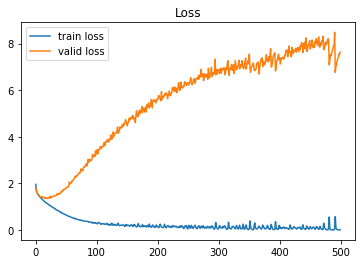

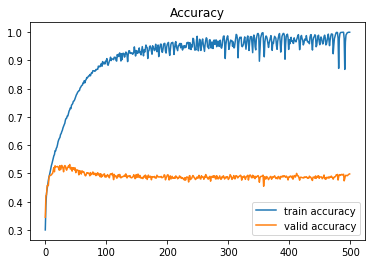

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

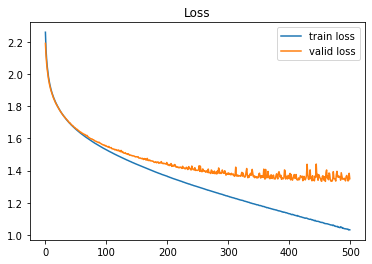

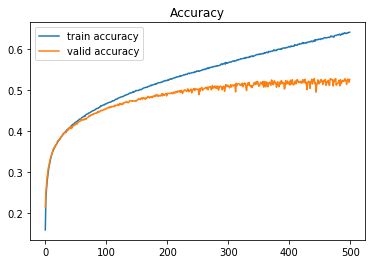

In [26]:
import pandas as pd
import numpy as np
# convert the history.history dict to a pandas DataFrame:   

hist_df = np.load("d077_500epoch_SGD_history.npy",allow_pickle=True).item()

hist_df.keys()
train_loss = hist_df["loss"]
valid_loss = hist_df["val_loss"]

train_acc = hist_df["accuracy"]
valid_acc = hist_df["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()